In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

**file:** audio_metadata_lluvias.csv <br>
The file contains metadata about 93,886 recordings:<br>
**sample rate:** The total of recordings has a sample rate of 192000 <br>
**channels:** It considers only one channel <br>
**bits:** All recordings were made in 16 bits <br>
**samples:** There are few observations taken with a different number of samples. 17 of 93,886 (0.02%) have a sample of 11,328,000. The other 99.08% were made at 11,520,000 <br>
**fsize:** Like Samples, 99.08% of recordings have a fsize of 23,040,488. The other 0.02% have a fsize of 22,656,488 <br>
**recorder_model:** All records were made with an Audiomoth<br>
**sensor_name/site:** Both columns have the same value. A code that identifies 97 sensors. It seems the count of recordings its uniform to all sensors, with a mean near to 968 recordings.<br>
**date:** the date in which the recordings were made. All records were made between November (99.6%) and December 2021 (0.4%) <br>
**time:** the hour of recording. It seems the count of recordings its uniform to all hours.

In [6]:
df=pd.read_csv("/content/drive/MyDrive/DS4All - Cohort6 - Team 172/Code/eda-tables/Dataset/audio_metadata_lluvias.csv")

In [7]:
df.head(2)

,path_audio,sample.rate,channels,bits,samples,fsize,recorder_model,sensor_name,date,time,length,site,fname_audio
0,G001/G001_20211109_140000.WAV,192000,1,16,11520000,23040488,Audiomoth,G001,2021-11-09 14:00:00,140000,60,G001,G001_20211109_140000.WAV
1,G001/G001_20211109_143000.WAV,192000,1,16,11520000,23040488,Audiomoth,G001,2021-11-09 14:30:00,143000,60,G001,G001_20211109_143000.WAV


In [8]:
df.isna().sum()

path_audio        0
sample.rate       0
channels          0
bits              0
samples           0
fsize             0
recorder_model    0
sensor_name       0
date              0
time              0
length            0
site              0
fname_audio       0
dtype: int64

In [9]:
df.describe()

,sample.rate,channels,bits,samples,fsize,time,length
count,93886.0,93886.0,93886.0,9.388600e+04,9.388600e+04,93886.000000,93886.000000
mean,192000.0,1.0,16.0,1.151997e+07,2.304042e+07,116479.400731,59.999819
std,0.0,0.0,0.0,2.583380e+03,5.166760e+03,69314.505498,0.013455
min,192000.0,1.0,16.0,1.132800e+07,2.265649e+07,0.000000,59.000000
25%,192000.0,1.0,16.0,1.152000e+07,2.304049e+07,53000.000000,60.000000
50%,192000.0,1.0,16.0,1.152000e+07,2.304049e+07,113000.000000,60.000000
75%,192000.0,1.0,16.0,1.152000e+07,2.304049e+07,180000.000000,60.000000
max,192000.0,1.0,16.0,1.152000e+07,2.304049e+07,233000.000000,60.000000


In [10]:
df["date"]=pd.to_datetime(df["date"])

In [11]:
"Dataset contains {} rows and {} columns".format(df.shape[0],df.shape[1])

'Dataset contains 93886 rows and 13 columns'

In [12]:
df["sample.rate"].value_counts()
#Sample rate is unique for all the dataset

192000    93886
Name: sample.rate, dtype: int64

In [13]:
df["channels"].value_counts()
#Channels is unique for all the dataset

1    93886
Name: channels, dtype: int64

In [14]:
df["bits"].value_counts()
#Bits are unique for all the dataset

16    93886
Name: bits, dtype: int64

In [15]:
df["samples"].value_counts()

11520000    93869
11328000       17
Name: samples, dtype: int64

In [16]:
"There are few observations taken with a different number of samples. {} of {} ({:.2f}%)".format(df["samples"].value_counts()[11328000],df["samples"].value_counts().sum(),df["samples"].value_counts()[11328000]/df["samples"].value_counts().sum()*100)

'There are few observations taken with a different number of samples. 17 of 93886 (0.02%)'

In [17]:
df["fsize"].value_counts()

23040488    93869
22656488       17
Name: fsize, dtype: int64

In [18]:
df["recorder_model"].value_counts()

Audiomoth    93886
Name: recorder_model, dtype: int64

In [19]:
df[df["sensor_name"]!=df["site"]]

,path_audio,sample.rate,channels,bits,samples,fsize,recorder_model,sensor_name,date,time,length,site,fname_audio


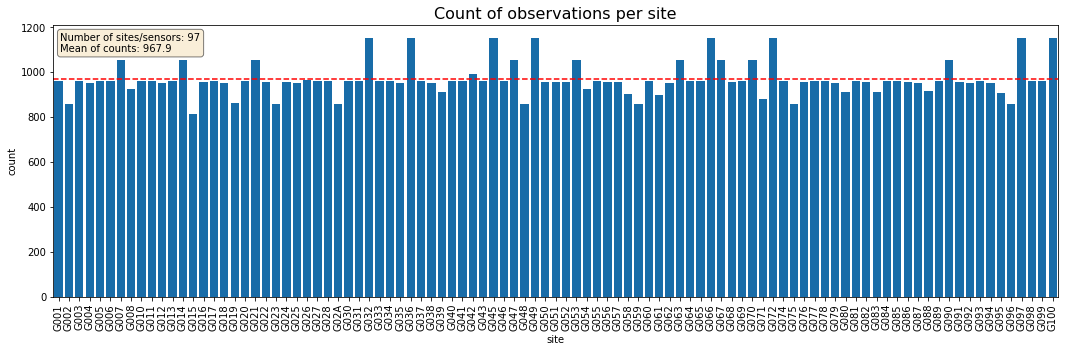

In [20]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(18,5))
g=sns.countplot(data=df, x="site",ax=ax,palette=["#0070C0"])
g.set_xticklabels(df.site.unique(),rotation=90);
plt.axhline(y=df.site.value_counts().mean(),color="r",linestyle="--");
textstr="\n".join(["Number of sites/sensors: {}".format(len(df.site.unique())),
                  "Mean of counts: {:.1f}".format(df.site.value_counts().mean())]);
props=dict(boxstyle="round",facecolor="wheat",alpha=0.5)
ax.text(0.007,0.9,textstr,transform=ax.transAxes,bbox=props);
plt.title("Count of observations per site",fontsize=16);

In [21]:
"There are {} sensors with an average of {:.2f} records per sensor".format(len(df.site.unique()),df.site.value_counts().mean())

'There are 97 sensors with an average of 967.90 records per sensor'

In [22]:
df["Month"]=df["date"].dt.year.astype(str)+"-"+df["date"].dt.month.astype(str)

In [23]:
"All the observations were made between {} and {}. {} months of observations".format(df.date.min(),df.date.max(),len(df["Month"].unique()))

'All the observations were made between 2021-11-04 10:30:00 and 2021-12-01 12:00:00. 2 months of observations'

In [24]:
df.Month.value_counts().sort_values(ascending=False)

2021-11    93528
2021-12      358
Name: Month, dtype: int64

In [25]:
"Almost all observations were made in {}. {} of {} {:.2f}%".format(df.Month.value_counts().sort_values(ascending=False).index[0], df.Month.value_counts().sort_values(ascending=False)[0],df.Month.value_counts().sort_values(ascending=False).sum(),df.Month.value_counts().sort_values(ascending=False)[0]/df.Month.value_counts().sort_values(ascending=False).sum()*100)

'Almost all observations were made in 2021-11. 93528 of 93886 99.62%'

In [26]:
df["hour"]=df["time"]/10000

In [27]:
df["hour"]=df["hour"].round(0).astype(int)

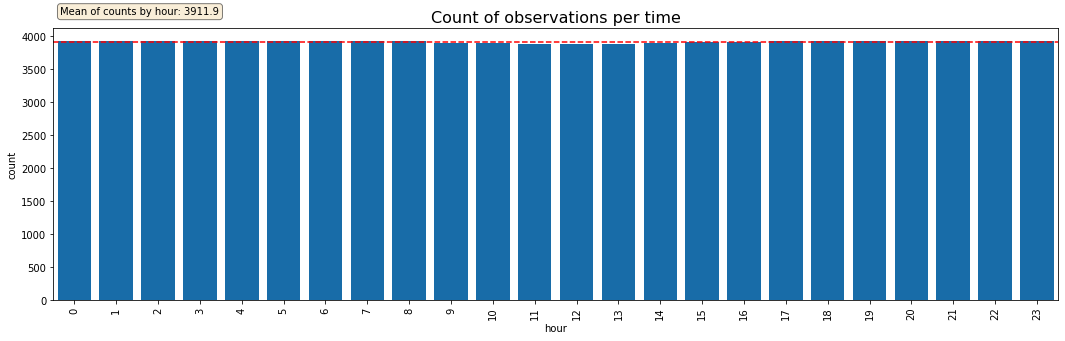

In [28]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(18,5))
g=sns.countplot(data=df, x="hour",ax=ax,palette=["#0070C0"],order=df.hour.value_counts().sort_index().index)
g.set_xticklabels(df.hour.value_counts().sort_index().index,rotation=90);
plt.axhline(y=df.hour.value_counts().mean(),color="r",linestyle="--");
textstr="\n".join(["Mean of counts by hour: {:.1f}".format(df.hour.value_counts().mean())]);
props=dict(boxstyle="round",facecolor="wheat",alpha=0.5)
ax.text(0.007,1.05,textstr,transform=ax.transAxes,bbox=props);
plt.title("Count of observations per time",fontsize=16);

In [29]:
df.hour.value_counts().sort_index()

0     3922
1     3922
2     3921
3     3922
4     3922
5     3922
6     3922
7     3922
8     3918
9     3901
10    3891
11    3883
12    3877
13    3885
14    3895
15    3907
16    3915
17    3918
18    3918
19    3919
20    3920
21    3920
22    3922
23    3922
Name: hour, dtype: int64

In [30]:
df.head()

,path_audio,sample.rate,channels,bits,samples,fsize,recorder_model,sensor_name,date,time,length,site,fname_audio,Month,hour
0,G001/G001_20211109_140000.WAV,192000,1,16,11520000,23040488,Audiomoth,G001,2021-11-09 14:00:00,140000,60,G001,G001_20211109_140000.WAV,2021-11,14
1,G001/G001_20211109_143000.WAV,192000,1,16,11520000,23040488,Audiomoth,G001,2021-11-09 14:30:00,143000,60,G001,G001_20211109_143000.WAV,2021-11,14
2,G001/G001_20211109_150000.WAV,192000,1,16,11520000,23040488,Audiomoth,G001,2021-11-09 15:00:00,150000,60,G001,G001_20211109_150000.WAV,2021-11,15
3,G001/G001_20211109_153000.WAV,192000,1,16,11520000,23040488,Audiomoth,G001,2021-11-09 15:30:00,153000,60,G001,G001_20211109_153000.WAV,2021-11,15
4,G001/G001_20211109_160000.WAV,192000,1,16,11520000,23040488,Audiomoth,G001,2021-11-09 16:00:00,160000,60,G001,G001_20211109_160000.WAV,2021-11,16


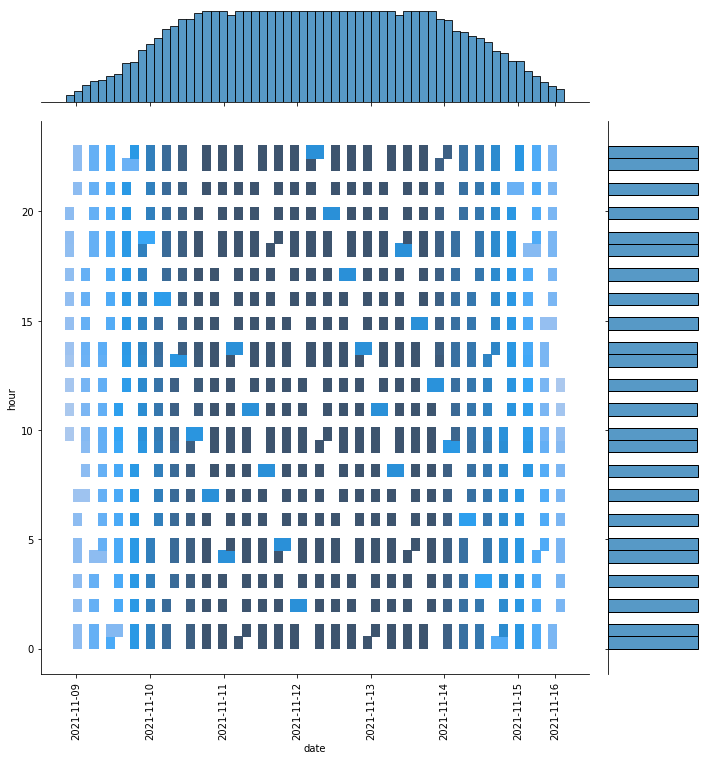

In [31]:
g=sns.jointplot(data=df, x="date", y="hour",kind="hist",height=10);
ax = g.ax_joint;
ax.set_xticklabels(df["date"].dt.strftime('%Y-%m-%d').unique(), rotation=90);

In [32]:
df["date"].dt.strftime('%Y-%m-%d').unique()

array(['2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12',
       '2021-11-13', '2021-11-14', '2021-11-15', '2021-11-16',
       '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-20',
       '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
       '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
       '2021-11-29', '2021-11-30', '2021-11-08', '2021-12-01',
       '2021-11-04', '2021-11-05', '2021-11-06', '2021-11-07'],
      dtype=object)

# Sección nueva

In [33]:
df.head()

,path_audio,sample.rate,channels,bits,samples,fsize,recorder_model,sensor_name,date,time,length,site,fname_audio,Month,hour
0,G001/G001_20211109_140000.WAV,192000,1,16,11520000,23040488,Audiomoth,G001,2021-11-09 14:00:00,140000,60,G001,G001_20211109_140000.WAV,2021-11,14
1,G001/G001_20211109_143000.WAV,192000,1,16,11520000,23040488,Audiomoth,G001,2021-11-09 14:30:00,143000,60,G001,G001_20211109_143000.WAV,2021-11,14
2,G001/G001_20211109_150000.WAV,192000,1,16,11520000,23040488,Audiomoth,G001,2021-11-09 15:00:00,150000,60,G001,G001_20211109_150000.WAV,2021-11,15
3,G001/G001_20211109_153000.WAV,192000,1,16,11520000,23040488,Audiomoth,G001,2021-11-09 15:30:00,153000,60,G001,G001_20211109_153000.WAV,2021-11,15
4,G001/G001_20211109_160000.WAV,192000,1,16,11520000,23040488,Audiomoth,G001,2021-11-09 16:00:00,160000,60,G001,G001_20211109_160000.WAV,2021-11,16


In [34]:
df.shape

(93886, 15)

In [35]:
df["sample.rate"].unique()

array([192000])

In [36]:
df["channels"].unique()

array([1])

In [37]:
df["bits"].unique()

array([16])

In [38]:
df["fsize"].unique()

array([23040488, 22656488])

In [39]:
df["recorder_model"].unique()

array(['Audiomoth'], dtype=object)

In [40]:
df["sensor_name"].unique()

array(['G001', 'G002', 'G003', 'G004', 'G005', 'G006', 'G007', 'G008',
       'G010', 'G011', 'G012', 'G013', 'G014', 'G015', 'G016', 'G017',
       'G018', 'G019', 'G020', 'G021', 'G022', 'G023', 'G024', 'G025',
       'G026', 'G027', 'G028', 'G02A', 'G030', 'G031', 'G032', 'G033',
       'G034', 'G035', 'G036', 'G037', 'G038', 'G039', 'G040', 'G041',
       'G042', 'G043', 'G045', 'G046', 'G047', 'G048', 'G049', 'G050',
       'G051', 'G052', 'G053', 'G054', 'G055', 'G056', 'G057', 'G058',
       'G059', 'G060', 'G061', 'G062', 'G063', 'G064', 'G065', 'G066',
       'G067', 'G068', 'G069', 'G070', 'G071', 'G072', 'G074', 'G075',
       'G076', 'G077', 'G078', 'G079', 'G080', 'G081', 'G082', 'G083',
       'G084', 'G085', 'G086', 'G087', 'G088', 'G089', 'G090', 'G091',
       'G092', 'G093', 'G094', 'G095', 'G096', 'G097', 'G098', 'G099',
       'G100'], dtype=object)

In [41]:
df["site"].unique()

array(['G001', 'G002', 'G003', 'G004', 'G005', 'G006', 'G007', 'G008',
       'G010', 'G011', 'G012', 'G013', 'G014', 'G015', 'G016', 'G017',
       'G018', 'G019', 'G020', 'G021', 'G022', 'G023', 'G024', 'G025',
       'G026', 'G027', 'G028', 'G02A', 'G030', 'G031', 'G032', 'G033',
       'G034', 'G035', 'G036', 'G037', 'G038', 'G039', 'G040', 'G041',
       'G042', 'G043', 'G045', 'G046', 'G047', 'G048', 'G049', 'G050',
       'G051', 'G052', 'G053', 'G054', 'G055', 'G056', 'G057', 'G058',
       'G059', 'G060', 'G061', 'G062', 'G063', 'G064', 'G065', 'G066',
       'G067', 'G068', 'G069', 'G070', 'G071', 'G072', 'G074', 'G075',
       'G076', 'G077', 'G078', 'G079', 'G080', 'G081', 'G082', 'G083',
       'G084', 'G085', 'G086', 'G087', 'G088', 'G089', 'G090', 'G091',
       'G092', 'G093', 'G094', 'G095', 'G096', 'G097', 'G098', 'G099',
       'G100'], dtype=object)

In [42]:
df=pd.read_csv("/content/drive/MyDrive/DS4All - Cohort6 - Team 172/Code/eda-tables/Dataset/audio_metadata_lluvias_with_environmental.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (22,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


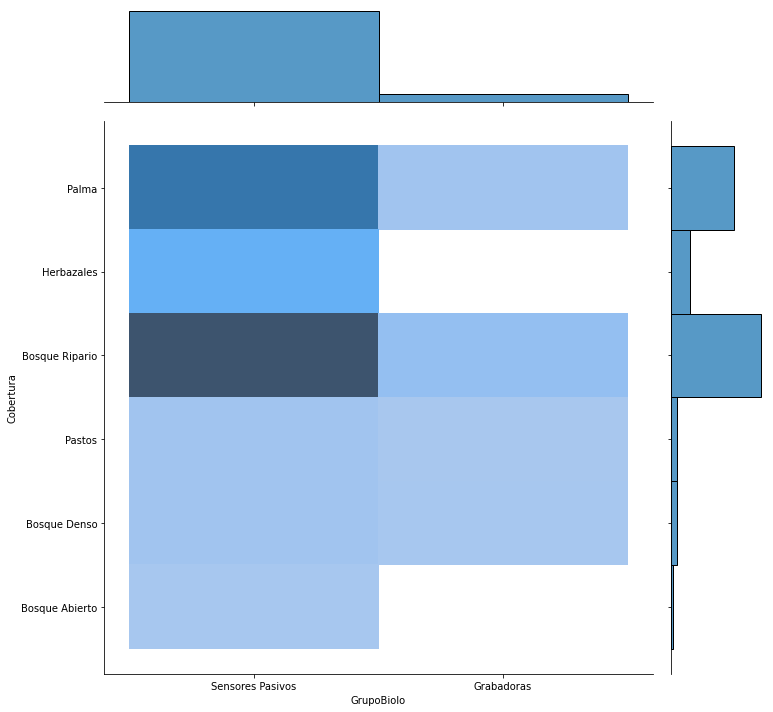

In [43]:
g=sns.jointplot(data=df, x="GrupoBiolo", y="Cobertura",kind="hist",height=10);

In [44]:
df.head(1)

,Unnamed: 0,path_audio,sample.rate,channels,bits,samples,fsize,recorder_model,sensor_name,date,...,Tipo Cuerpo Agua,Nombre,FInt19meanx,HEH18meanx,Unnamed: 37,Latitud/Longitud (grados decimales),Presión sonora 1,Presión sonora 2,Presión sonora 3,Presión sonora 4
0,0,G001/G001_20211109_140000.WAV,192000,1,16,11520000,23040488,Audiomoth,G001,2021-11-09 14:00:00,...,NaN,NaN,1.0,62.0,NaN,"7.3723004,-73.8630135",54.8,45.8,40.1,39.8


In [45]:
labeled_df=pd.read_csv("/content/drive/MyDrive/DS4All - Cohort6 - Team 172/Code/eda-tables/Dataset/audio_labels.csv")

In [46]:
labeled_df.head()

,fname,label,max_f,max_t,min_f,min_t,sample_idx
0,G001_20211112_030000.WAV,SENSAT,47297.562,5.0,47297.562,0.0,0000.wav
1,G001_20211112_180000.WAV,MURCIE,44956.098,5.0,24819.512,0.0,0001.wav
2,G001_20211112_183000.WAV,INSECT,51980.490,5.0,3721.417,0.0,0002.wav
3,G001_20211112_203000.WAV,MURCIE,33482.926,5.0,16776.250,0.0,0003.wav
4,G001_20211112_220000.WAV,SENSAT,24585.365,5.0,24585.365,0.0,0004.wav


In [47]:
labels={"SENSAT":"Saturated","MURCIE":"Bat","INSECT":"Insect","LLUVIA":"Rain","PULSOS":"Pulse",
        "HERPET":"Herpetus","ANTROP":"anthrophony","AVEVOC":"Birds","TRAMOT":"Motor",
        "INDETE":"Indeterminate","PASOS":"Steps","FLUAGU":"Water Flow","ANIDOM":"domesticated animals"}
gLabels={"SENSAT":"Other","MURCIE":"biophony","INSECT":"biophony","LLUVIA":"geophony","PULSOS":"Other",
        "HERPET":"biophony","ANTROP":"anthrophony","AVEVOC":"biophony","TRAMOT":"anthrophony",
        "INDETE":"Other","PASOS":"Other","FLUAGU":"geophony","ANIDOM":"anthrophony"}
labeled_df["label"].unique()

array(['SENSAT', 'MURCIE', 'INSECT', 'LLUVIA', 'PULSOS', 'HERPET',
       'ANTROP', 'AVEVOC', 'TRAMOT', 'INDETE', 'PASOS', 'FLUAGU',
       'ANIDOM'], dtype=object)

In [48]:
labeled_df["label_desc"]=labeled_df["label"].replace(labels)
labeled_df["grand_label"]=labeled_df["label"].replace(gLabels)

In [49]:
labeled_df.isna().sum()

fname          0
label          0
max_f          0
max_t          0
min_f          0
min_t          0
sample_idx     0
label_desc     0
grand_label    0
dtype: int64

In [50]:
labeled_df.head(1)

,fname,label,max_f,max_t,min_f,min_t,sample_idx,label_desc,grand_label
0,G001_20211112_030000.WAV,SENSAT,47297.562,5.0,47297.562,0.0,0000.wav,Saturated,Other


In [51]:
labeled_df.shape

(1104, 9)

In [52]:
labeled_df=labeled_df.merge(df[["fname_audio","Cobertura","date"]],left_on=["fname"],right_on=["fname_audio"],how="left")

In [53]:
labeled_df.isna().sum()

fname          0
label          0
max_f          0
max_t          0
min_f          0
min_t          0
sample_idx     0
label_desc     0
grand_label    0
fname_audio    6
Cobertura      6
date           6
dtype: int64

In [54]:
labeled_df["date"]=pd.to_datetime(labeled_df["date"])

In [55]:
labeled_df["hour"]=labeled_df["date"].dt.hour

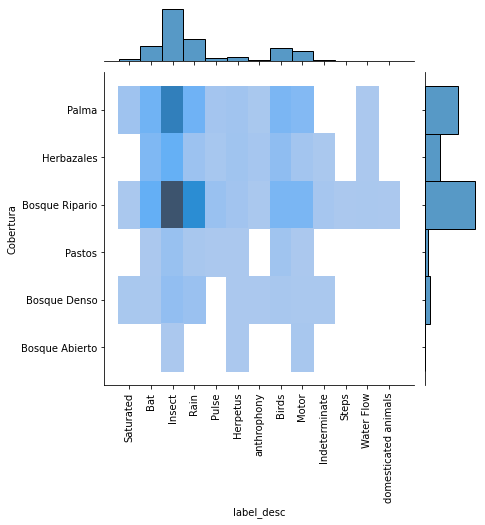

In [57]:
g=sns.jointplot(data=labeled_df, x="label_desc", y="Cobertura",kind="hist",height=6); #,kind="hist",height=10
ax = g.ax_joint;
ax.set_xticklabels(labeled_df["label_desc"].unique(), rotation=90);

In [58]:
labeled_df["label_desc"].unique()

array(['Saturated', 'Bat', 'Insect', 'Rain', 'Pulse', 'Herpetus',
       'anthrophony', 'Birds', 'Motor', 'Indeterminate', 'Steps',
       'Water Flow', 'domesticated animals'], dtype=object)

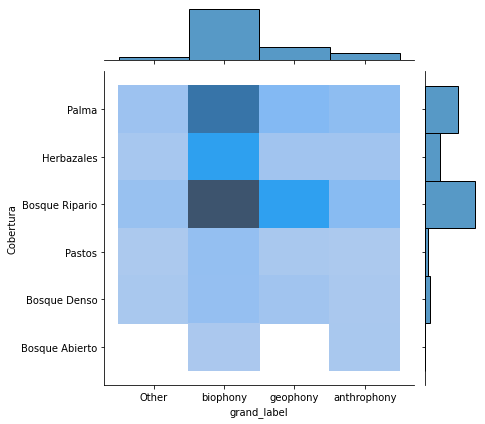

In [59]:
g=sns.jointplot(data=labeled_df, x="grand_label", y="Cobertura",kind="hist",height=6); #,kind="hist",height=10
ax = g.ax_joint;
#ax.set_xticklabels(labeled_df["grand_label"].unique(), rotation=90);

In [60]:
labeled_df["grand_label"].unique()

array(['Other', 'biophony', 'geophony', 'anthrophony'], dtype=object)

In [61]:
cEng={"Palma":"palm","Herbazales":"grassland","Bosque Ripario":"riparian forest","Pastos":"grasses",
      "Bosque Denso":"dense forest","Bosque Abierto":"open forest"}
labeled_df["Ecosystem"]=labeled_df["Cobertura"].replace(cEng)

In [63]:
labeled_df["Ecosystem"].replace(cEng).unique()

array(['palm', 'grassland', 'riparian forest', 'grasses', 'dense forest',
       nan, 'open forest'], dtype=object)

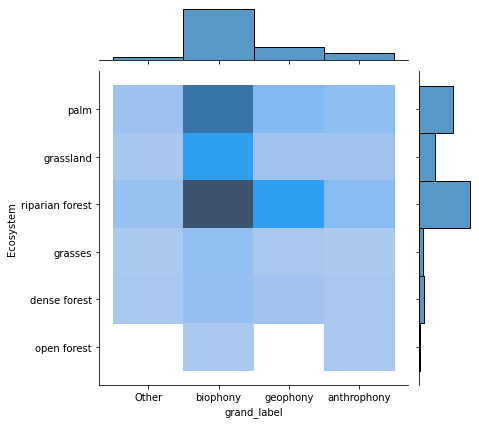

In [ ]:
g=sns.jointplot(data=labeled_df, x="grand_label", y="Ecosystem",kind="hist",height=6); #,kind="hist",height=10
ax = g.ax_joint;

In [ ]:
labeled_df

,fname,label,max_f,max_t,min_f,min_t,sample_idx,label_desc,grand_label,fname_audio,Cobertura,date,hour,Ecosystem
0,G001_20211112_030000.WAV,SENSAT,47297.562,5.0,47297.562,0.000000,0000.wav,Saturated,Other,G001_20211112_030000.WAV,Palma,2021-11-12 03:00:00,3.0,palm
1,G001_20211112_180000.WAV,MURCIE,44956.098,5.0,24819.512,0.000000,0001.wav,Bat,biophony,G001_20211112_180000.WAV,Palma,2021-11-12 18:00:00,18.0,palm
2,G001_20211112_183000.WAV,INSECT,51980.490,5.0,3721.417,0.000000,0002.wav,Insect,biophony,G001_20211112_183000.WAV,Palma,2021-11-12 18:30:00,18.0,palm
3,G001_20211112_203000.WAV,MURCIE,33482.926,5.0,16776.250,0.000000,0003.wav,Bat,biophony,G001_20211112_203000.WAV,Palma,2021-11-12 20:30:00,20.0,palm
4,G001_20211112_220000.WAV,SENSAT,24585.365,5.0,24585.365,0.000000,0004.wav,Saturated,Other,G001_20211112_220000.WAV,Palma,2021-11-12 22:00:00,22.0,palm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,G100_20211111_073000.WAV,AVEVOC,5520.767,10.0,843.450,1.185324,1099.wav,Birds,biophony,G100_20211111_073000.WAV,Bosque Ripario,2021-11-11 07:30:00,7.0,riparian forest
1100,G100_20211116_180000.WAV,TRAMOT,766.773,10.0,0.000,0.000000,1100.wav,Motor,anthrophony,G100_20211116_180000.WAV,Bosque Ripario,2021-11-16 18:00:00,18.0,riparian forest
1101,G100_20211121_070000.WAV,LLUVIA,49073.482,10.0,0.000,0.000000,1101.wav,Rain,geophony,G100_20211121_070000.WAV,Bosque Ripario,2021-11-21 07:00:00,7.0,riparian forest
1102,G100_20211128_063000.WAV,AVEVOC,2607.029,10.0,460.064,0.000000,1102.wav,Birds,biophony,G100_20211128_063000.WAV,Bosque Ripario,2021-11-28 06:30:00,6.0,riparian forest


In [ ]:
dfInd=pd.read_csv("/content/drive/MyDrive/DS4All - Cohort6 - Team 172/Code/eda-tables/Dataset/allsites_acoustic_indices_env.csv")

In [ ]:
dfInd.head()

,ACI,ADI,BI,H,Hf,Ht,NDSI,NP,SC,date,fname_audio,sensor_name,time,Cobertura,proba_rain
0,303.127146,3.087798,3.001891,0.892344,0.924358,0.965367,0.681387,0.0,0.000000,2021-11-09 14:00:00,G001_20211109_140000.WAV,G001,14,Palma,0.00
1,313.319992,3.076320,10.285248,0.807247,0.883948,0.913229,0.766296,1.0,0.000095,2021-11-09 14:30:00,G001_20211109_143000.WAV,G001,14,Palma,0.01
2,319.347569,3.040486,13.308916,0.734403,0.777215,0.944916,0.309720,4.0,0.000295,2021-11-09 15:00:00,G001_20211109_150000.WAV,G001,15,Palma,0.00
3,309.366694,3.076533,9.306343,0.808704,0.831003,0.973166,0.914500,7.0,0.000628,2021-11-09 15:30:00,G001_20211109_153000.WAV,G001,15,Palma,0.00
4,307.190642,3.046628,20.313311,0.850281,0.873987,0.972876,0.812334,6.0,0.000306,2021-11-09 16:00:00,G001_20211109_160000.WAV,G001,16,Palma,0.00


In [ ]:
dfInd.columns

Index(['ACI', 'ADI', 'BI', 'H', 'Hf', 'Ht', 'NDSI', 'NP', 'SC', 'date',
       'fname_audio', 'sensor_name', 'time', 'Cobertura', 'proba_rain'],
      dtype='object')

In [ ]:
df=labeled_df.merge(dfInd.rename(columns={"fname_audio":"fname"})[['ACI', 'ADI', 'BI', 'H', 'Hf', 'Ht', 'NDSI', 'NP', 'SC', 'fname']],on="fname",how="left")

In [ ]:
df.head()

,fname,label,max_f,max_t,min_f,min_t,sample_idx,label_desc,grand_label,fname_audio,...,Ecosystem,ACI,ADI,BI,H,Hf,Ht,NDSI,NP,SC
0,G001_20211112_030000.WAV,SENSAT,47297.562,5.0,47297.562,0.0,0000.wav,Saturated,Other,G001_20211112_030000.WAV,...,palm,377.383311,3.075662,39.688725,0.734006,0.762148,0.963076,0.999129,53.0,0.386757
1,G001_20211112_180000.WAV,MURCIE,44956.098,5.0,24819.512,0.0,0001.wav,Bat,biophony,G001_20211112_180000.WAV,...,palm,360.936397,2.997474,63.697559,0.528988,0.546513,0.967934,0.995743,49.0,0.067657
2,G001_20211112_183000.WAV,INSECT,51980.490,5.0,3721.417,0.0,0002.wav,Insect,biophony,G001_20211112_183000.WAV,...,palm,343.203840,3.035617,79.388452,0.682144,0.774799,0.880414,0.995949,56.0,0.209376
3,G001_20211112_203000.WAV,MURCIE,33482.926,5.0,16776.250,0.0,0003.wav,Bat,biophony,G001_20211112_203000.WAV,...,palm,317.107274,3.070980,64.710699,0.847784,0.867532,0.977236,0.975826,46.0,0.115287
4,G001_20211112_220000.WAV,SENSAT,24585.365,5.0,24585.365,0.0,0004.wav,Saturated,Other,G001_20211112_220000.WAV,...,palm,336.516907,3.021655,64.720336,0.658256,0.790203,0.833022,0.997042,51.0,0.147669


In [ ]:
df.columns

Index(['fname', 'label', 'max_f', 'max_t', 'min_f', 'min_t', 'sample_idx',
       'label_desc', 'grand_label', 'fname_audio', 'Cobertura', 'date', 'hour',
       'Ecosystem', 'ACI', 'ADI', 'BI', 'H', 'Hf', 'Ht', 'NDSI', 'NP', 'SC'],
      dtype='object')

In [ ]:
df=df[['fname', 'label', 'label_desc', 'grand_label', 'fname_audio', 'Cobertura', 'date', 'hour',
       'Ecosystem', 'ACI', 'ADI', 'BI', 'H', 'Hf', 'Ht', 'NDSI', 'NP', 'SC']]

In [ ]:
df=pd.melt(df, id_vars=['fname', 'label','label_desc', 'grand_label',"Ecosystem",'hour'], 
        value_vars=['BI', 'NP','ACI', 'NDSI', 'ADI', 'H', 'Ht', 'Hf', 'SC'], 
        var_name="Index", value_name='value')

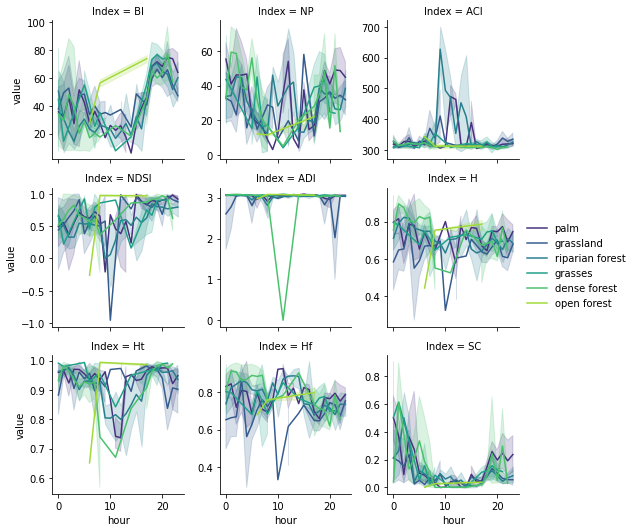

In [ ]:
g = sns.FacetGrid(df, col="Index", height=2.5, col_wrap=3,sharey=False)
g.map(sns.lineplot, "hour", "value","Ecosystem",palette="viridis").add_legend();

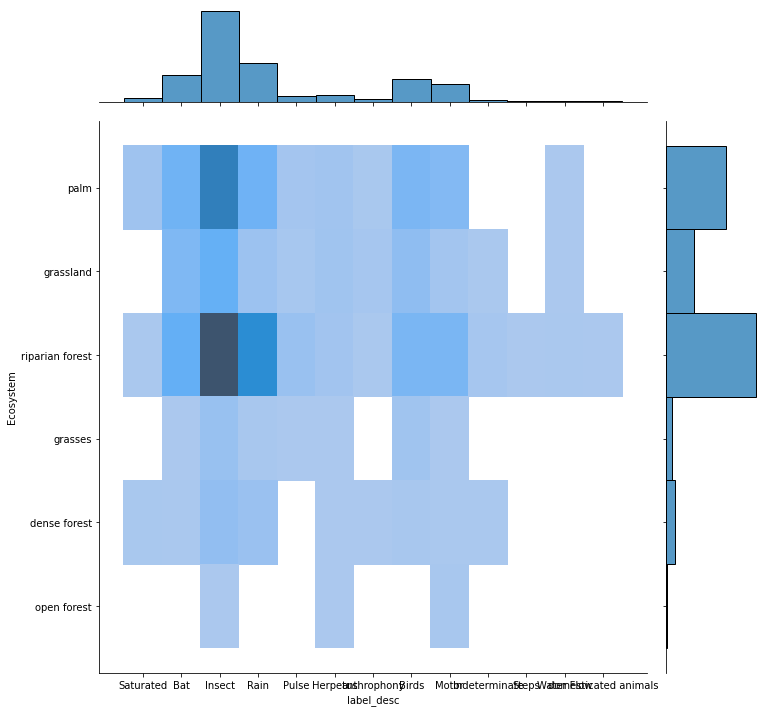

In [ ]:
g=sns.jointplot(data=labeled_df, x="label_desc", y="Ecosystem",kind="hist",height=10); #,kind="hist",height=10
ax = g.ax_joint;

In [ ]:
labeled_df.columns

Index(['fname', 'label', 'max_f', 'max_t', 'min_f', 'min_t', 'sample_idx',
       'label_desc', 'grand_label', 'fname_audio', 'Cobertura', 'date', 'hour',
       'Ecosystem'],
      dtype='object')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

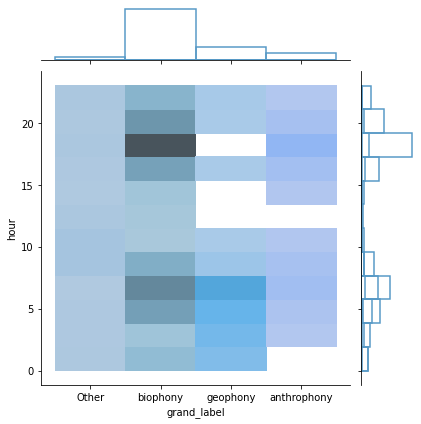

In [ ]:
g=sns.jointplot(data=labeled_df, x="grand_label", y="hour",kind="hist",height=6,hue="grand_label",
                marginal_kws={"fill":False,"color":"#5799C6"},legend=False,palette="Blues"); #,kind="hist",height=10
ax = g.ax_joint;
#plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
#ax.set_xticklabels(labeled_df["grand_label"].unique(), rotation=90);
plt.setp(g.ax_marg_y.patches, color="#5799C6",fill=False)
plt.setp(g.ax_marg_x.patches, color="#5799C6",fill=False)

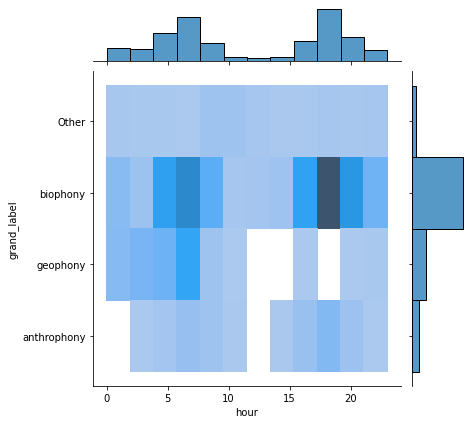

In [ ]:
g=sns.jointplot(data=labeled_df, x="hour", y="grand_label",kind="hist",height=6); #,kind="hist",height=10

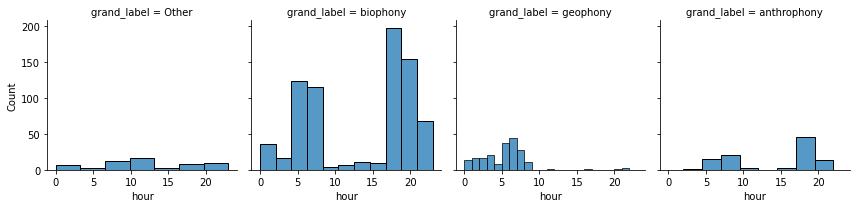

In [ ]:
g = sns.FacetGrid(labeled_df, col="grand_label");
g.map_dataframe(sns.histplot, x="hour");

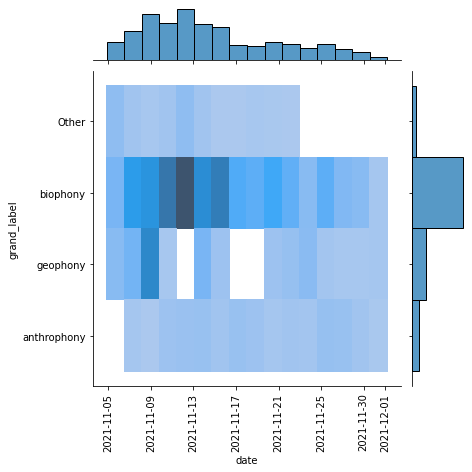

In [ ]:
g=sns.jointplot(data=labeled_df, x="date", y="grand_label",kind="hist",height=6); #,kind="hist",height=10
ax = g.ax_joint;
#ax.get_xticklabels()
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_xticklabels(["2021-11-05","2021-11-09","2021-11-13","2021-11-17","2021-11-21",
                   "2021-11-25","2021-11-30","2021-12-01"], rotation=90);

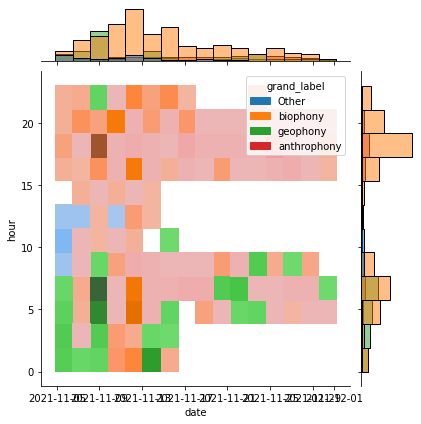

In [ ]:
g=sns.jointplot(data=labeled_df, x="date", y="hour",kind="hist",height=6,hue="grand_label",palette); #,kind="hist",height=10

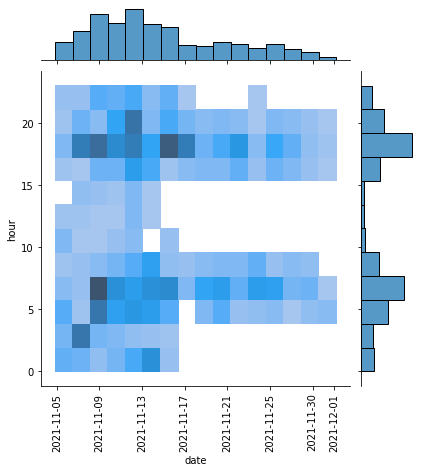

In [ ]:
g=sns.jointplot(data=labeled_df, x="date", y="hour",height=6,kind="hist"); #,kind="hist",height=10
ax = g.ax_joint;
#ax.get_xticklabels()
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_xticklabels(["2021-11-05","2021-11-09","2021-11-13","2021-11-17","2021-11-21",
                   "2021-11-25","2021-11-30","2021-12-01"], rotation=90);

In [ ]:
count_df=labeled_df[["date","hour"]].copy()

In [ ]:
count_df.date=count_df.date.dt.date

In [ ]:
count_df["Value"]=1

In [ ]:
count_df=count_df.groupby(["date","hour"]).sum().reset_index()

In [ ]:
count_df=count_df.pivot("date","hour","Value")

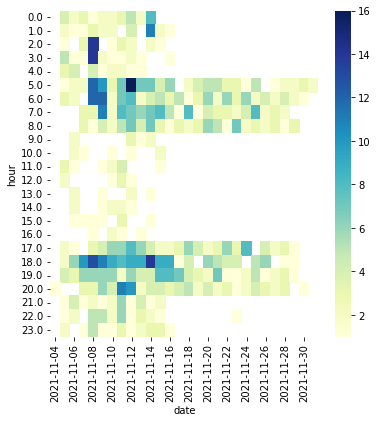

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))  
sns.heatmap(count_df.T,cmap="YlGnBu",ax=ax);

In [ ]:
ax = sns.heatmap(labeled_df, cmap="YlGnBu")

ValueError: ignored

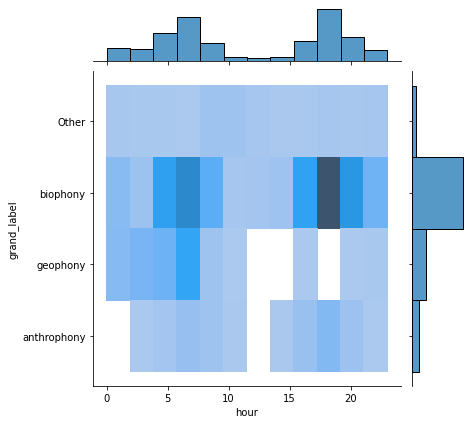

In [ ]:
g=sns.jointplot(data=labeled_df, x="hour", y="grand_label",height=6,kind="hist"); #,kind="hist",height=10

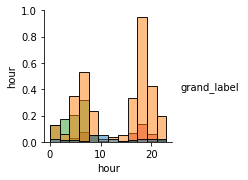

In [ ]:
sns.pairplot(labeled_df[["hour","date","grand_label"]], hue="grand_label",kind="hist")

In [ ]:
labeled_df

,fname,label,max_f,max_t,min_f,min_t,sample_idx,label_desc,grand_label,fname_audio,Cobertura,date
0,G001_20211112_030000.WAV,SENSAT,47297.562,5.0,47297.562,0.000000,0000.wav,Saturated,Other,G001_20211112_030000.WAV,Palma,2021-11-12 03:00:00
1,G001_20211112_180000.WAV,MURCIE,44956.098,5.0,24819.512,0.000000,0001.wav,Bat,biophony,G001_20211112_180000.WAV,Palma,2021-11-12 18:00:00
2,G001_20211112_183000.WAV,INSECT,51980.490,5.0,3721.417,0.000000,0002.wav,Insect,biophony,G001_20211112_183000.WAV,Palma,2021-11-12 18:30:00
3,G001_20211112_203000.WAV,MURCIE,33482.926,5.0,16776.250,0.000000,0003.wav,Bat,biophony,G001_20211112_203000.WAV,Palma,2021-11-12 20:30:00
4,G001_20211112_220000.WAV,SENSAT,24585.365,5.0,24585.365,0.000000,0004.wav,Saturated,Other,G001_20211112_220000.WAV,Palma,2021-11-12 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1099,G100_20211111_073000.WAV,AVEVOC,5520.767,10.0,843.450,1.185324,1099.wav,Birds,biophony,G100_20211111_073000.WAV,Bosque Ripario,2021-11-11 07:30:00
1100,G100_20211116_180000.WAV,TRAMOT,766.773,10.0,0.000,0.000000,1100.wav,Motor,antropophony,G100_20211116_180000.WAV,Bosque Ripario,2021-11-16 18:00:00
1101,G100_20211121_070000.WAV,LLUVIA,49073.482,10.0,0.000,0.000000,1101.wav,Rain,geophony,G100_20211121_070000.WAV,Bosque Ripario,2021-11-21 07:00:00
1102,G100_20211128_063000.WAV,AVEVOC,2607.029,10.0,460.064,0.000000,1102.wav,Birds,biophony,G100_20211128_063000.WAV,Bosque Ripario,2021-11-28 06:30:00


In [ ]:
labeled_df.columns

Index(['fname', 'label', 'max_f', 'max_t', 'min_f', 'min_t', 'sample_idx',
       'label_desc', 'grand_label', 'fname_audio', 'Cobertura', 'date'],
      dtype='object')